In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np

from numpy.random import choice, normal

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.stats import median_abs_deviation as mad

from local_utils import *
kappa = 0.4

# WS_file = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/WE__0133___________DER_WS__________________P01.xml'
which_sol = "0076"
path = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/'
WS_file = path + 'WE__%s___________DER_WS__________________P02.xml' % (which_sol)

time, wind = retrieve_time_wind(WS_file)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Processing label: /Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/WE__0076___________DER_WS__________________P02.xml
Now processing a Header structure: HEADER
Now processing a Table_Delimited structure: TABLE


Processing label: /Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/WE__0091___________DER_WS__________________P02.xml
Now processing a Header structure: HEADER
Now processing a Table_Delimited structure: TABLE


(-25566.70138888889, -25566.694444444445)

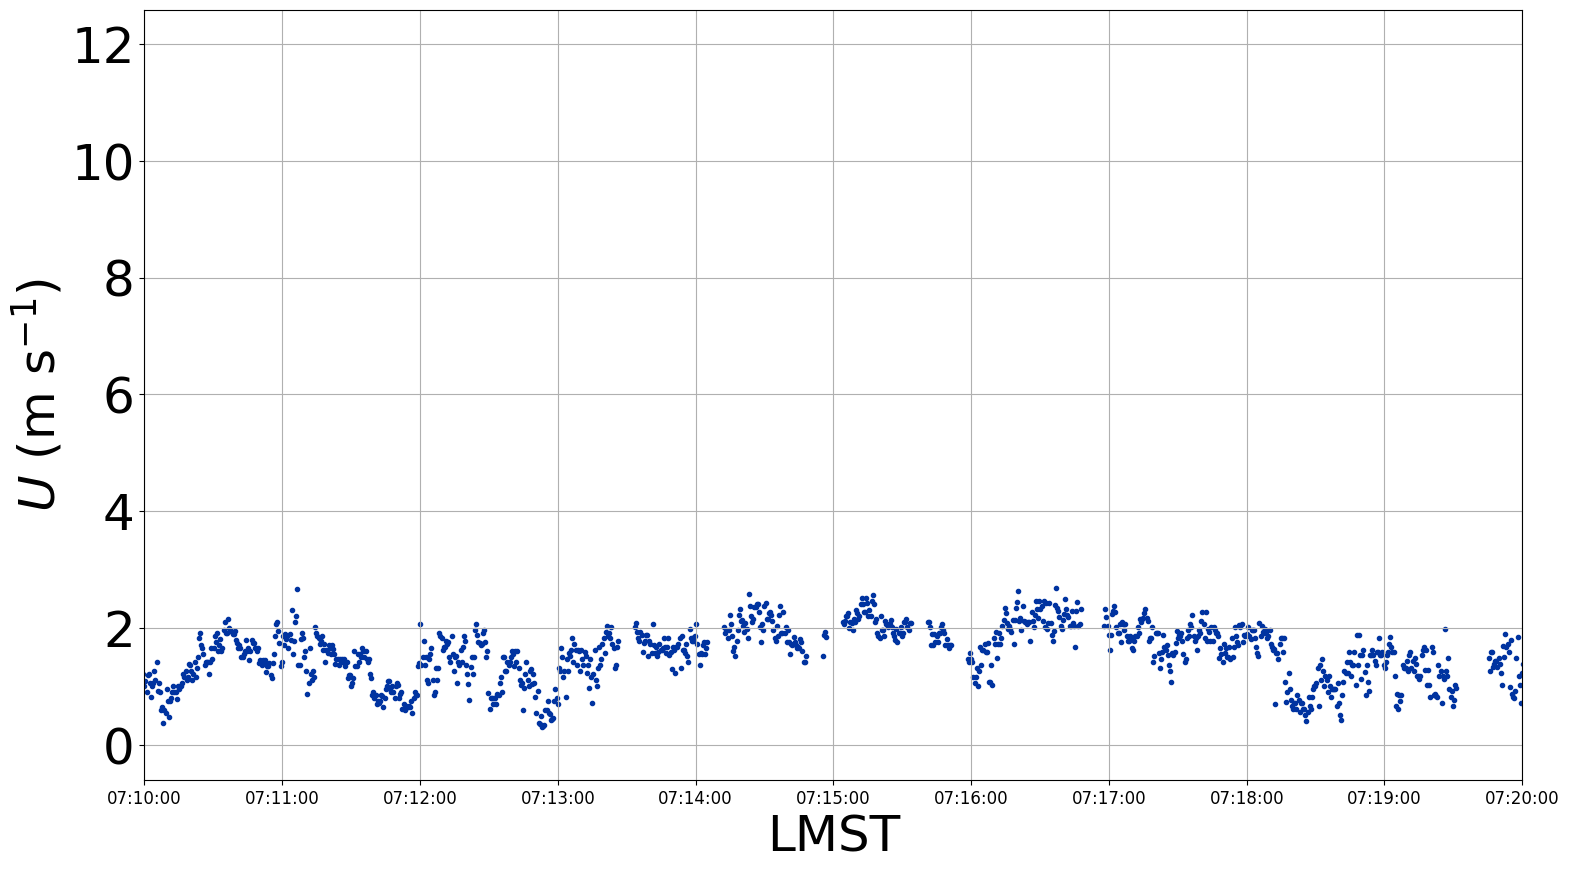

In [9]:
# When during the day should you fly?
# In terms of times after sunrise, probably between 6 and 9am.

path = '/Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/'
WS_file = path + 'WE__%s___________DER_WS__________________P02.xml' % (which_sol)

fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot(111)

time, wind = retrieve_time_wind(WS_file, start_time=None, end_time=None)
ax.scatter(time, wind, marker='.', color=BoiseState_blue)

xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.grid(True)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=36)
ax.set_xlabel("LMST", fontsize=36)
ax.set_ylabel(r'$U\ \left( {\rm m\ s^{-1}} \right)$', fontsize=36)
# ax.set_xlim([start_time, end_time])
ax.set_xlim([datetime(1900, 1, 1, 7, 10, 0), datetime(1900, 1, 1, 7, 20, 0)])

# fig.savefig("Sol133_Windspeeds.jpg", dpi=300, bbox_inches="tight")

Processing label: /Users/brian/Documents/research/Active Projects/Measuring_Wind_with_Ingenuity/code/MEDA_WS_Data/WE__0076___________DER_WS__________________P02.xml
Now processing a Header structure: HEADER
Now processing a Table_Delimited structure: TABLE
16.458505232264148


Text(0.05, 0.675, 'Correct $z_\\star = 10\\, {\\rm cm}$')

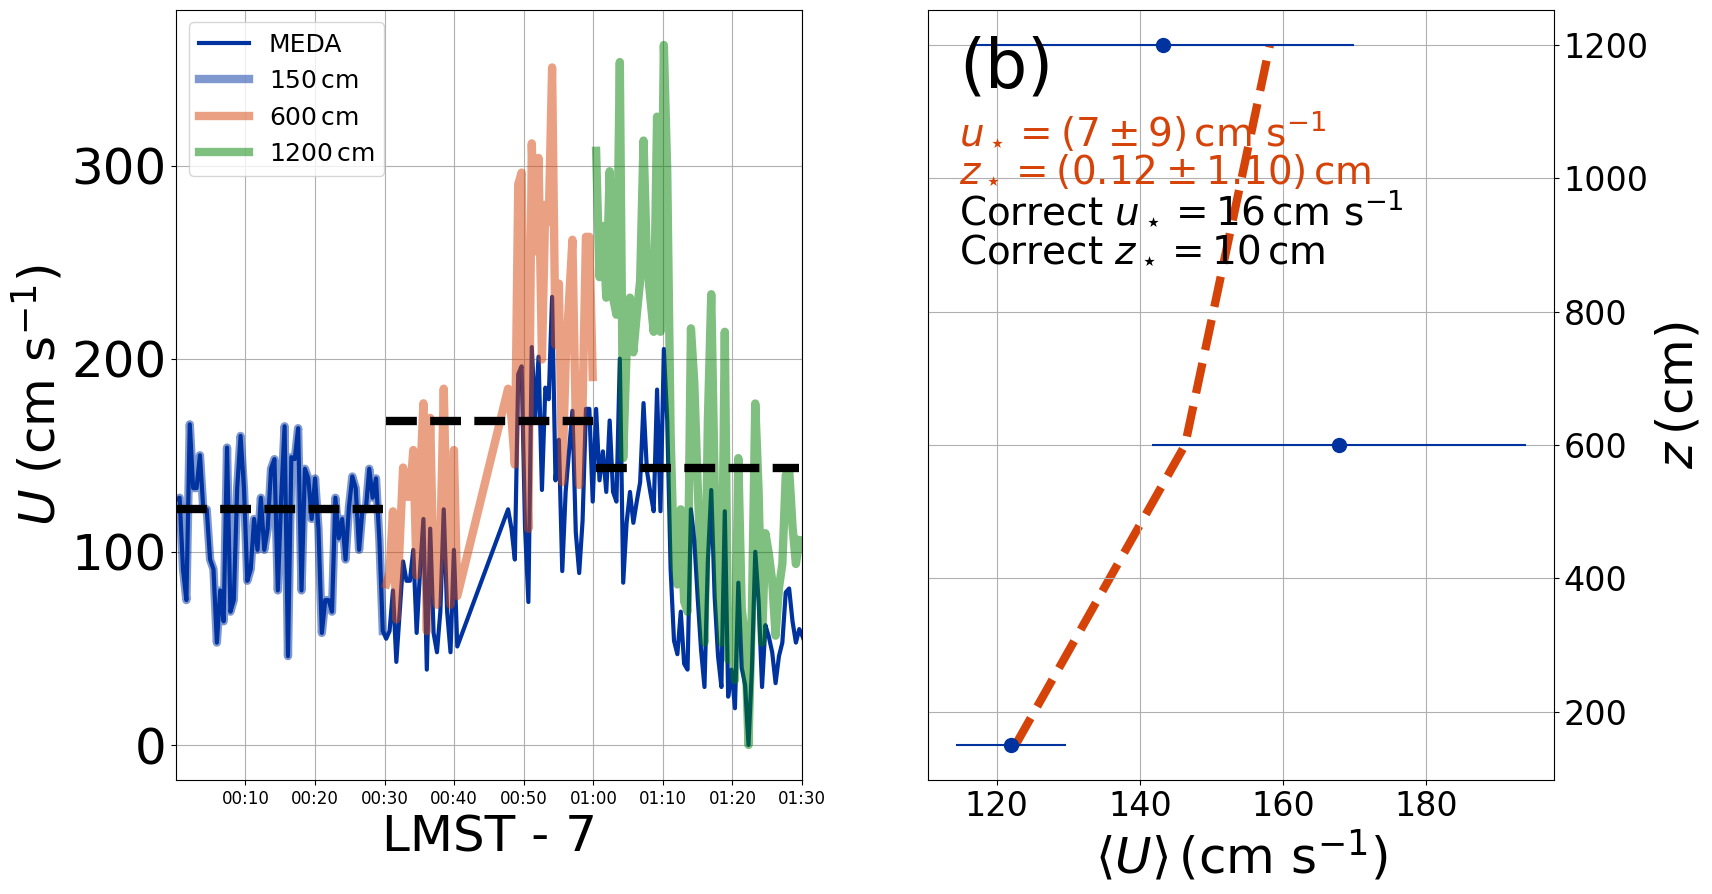

In [18]:
fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# For sol 91, the wind speeds at 7a are pretty low. Let's try a little later when they pick up.
# time, wind = retrieve_time_wind(WS_file, start_time=datetime(1900, 1, 1, 7, 40, 0))

# For sol 107, the wind speeds at 7a are pretty low. Let's try a little later when they pick up.
# time, wind = retrieve_time_wind(WS_file, start_time=datetime(1900, 1, 1, 7, 20, 15))

time, wind = retrieve_time_wind(WS_file)

# time, wind = retrieve_time_wind(WS_file)
# wind *= 100. # Convert to cm/s

saved_zstar = 10. # cm
saved_ustar = kappa*np.mean(wind)/np.log(zs[0]/saved_zstar)
print(saved_ustar)

# Create synthetic wind profile, converting wind speeds to cm/s
scaled_windspeeds = create_synthetic_wind_profile(wind, zs, saved_zstar, z0=np.min(zs))
t0 = np.min(time)
averaged_windspeeds, std_windspeeds = sample_wind_profile(sample_time, t0, time, scaled_windspeeds, zs)

# Make plot of original and scaled wind speeds
# zs, time, sample_time, scaled_windspeeds, averaged_windspeeds, axis

ax1 = make_plot_of_original_and_scaled_windspeeds(time, wind, zs, sample_time, t0, scaled_windspeeds, 
                                                  averaged_windspeeds, ax1)
ax1.set_xlim([np.min(time), np.min(time) + timedelta(seconds=len(zs)*sampling_duration)])
# ax1.set_ylim([100, 600])

### Fit synthetic wind profile ###

inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,\
    outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds,\
    popt, unc, pcov = fit_wind_profile_and_drop_outliers(zs, averaged_windspeeds, std_windspeeds,
                                                         drop_outliers=False, num_sigma=5., rescale_unc=True,
                                                         consider_scaled_uncertainties=False)

# Collect ustar and zstar and uncertainties
ustar, zstar, sigma_ustar, sigma_zstar = collect_fit_values_and_unc(popt, unc, pcov)

ax2 = make_plot_of_wind_data_and_profile(inlier_zs, inlier_averaged_windspeeds, inlier_std_windspeeds,
                                         outlier_zs, outlier_averaged_windspeeds, outlier_std_windspeeds, 
                                         popt, unc, pcov, ax2)

ax2.text(0.05, 0.725, r'Correct $u_\star = %.0f\, {\rm cm\ s^{-1}}$' % (saved_ustar), 
         fontsize=28, transform=ax2.transAxes)
ax2.text(0.05, 0.675, r'Correct $z_\star = %.0f\, {\rm cm}$' % (saved_zstar), 
         fontsize=28, transform=ax2.transAxes)

# # fig.savefig("Synthetic_Mars_Wind_Profile_Sol133.jpg", dpi=300, bbox_inches="tight")

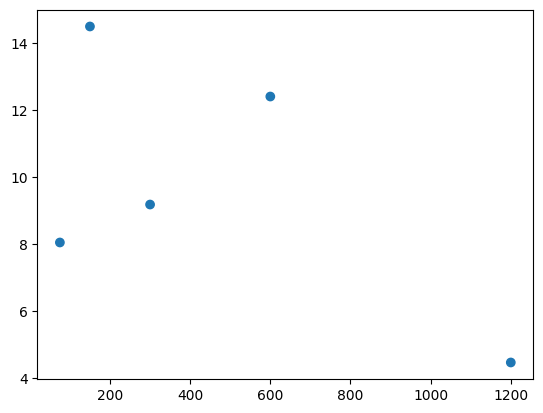

In [63]:
# time, wind = retrieve_time_wind(WS_file)
# wind *= 100. # Convert to cm/s

saved_zstar = 3. # cm
saved_ustar = kappa*np.mean(wind)/np.log(zs[0]/saved_zstar)

# Create synthetic wind profile, converting wind speeds to cm/s
# scaled_windspeeds = create_synthetic_wind_profile(wind, zs, saved_zstar, z0=np.min(zs))
t0 = np.min(time)

# Have NO wind profile scaling - just use the actual wind speeds
scaled_windspeeds = np.array([wind, wind, wind, wind, wind])
averaged_windspeeds, std_windspeeds = sample_wind_profile(sample_time, t0, time, scaled_windspeeds, zs)

# plt.errorbar(zs, averaged_windspeeds, yerr=std_windspeeds, ls='', marker='o')
plt.scatter(zs, averaged_windspeeds/inlier_std_windspeeds, ls='', marker='o')